# Model Development 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#importing the final csv file which was manuplated in 2 section
path='./final.csv'
df=pd.read_csv(path)
df.head()

,width,curb-weight,engine-size,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned
0,0.890278,2548,130,111,5000.0,13495,11.190476,8.703704,low
1,0.890278,2548,130,111,5000.0,16500,11.190476,8.703704,low
2,0.909722,2823,152,154,5000.0,16500,12.368421,9.038462,medium
3,0.919444,2337,109,102,5500.0,13950,9.791667,7.833333,low
4,0.922222,2824,136,115,5500.0,17450,13.055556,10.681818,low


In [3]:
df.corr()

,width,curb-weight,engine-size,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
width,1.000000,0.866201,0.729436,0.614972,-0.245852,0.751265,0.673363,0.736728
curb-weight,0.866201,1.000000,0.849072,0.758001,-0.279350,0.834415,0.785353,0.836921
engine-size,0.729436,0.849072,1.000000,0.822636,-0.256753,0.872335,0.745059,0.783465
horsepower,0.614972,0.758001,0.822636,1.000000,0.107882,0.809729,0.889454,0.840695
peak-rpm,-0.245852,-0.279350,-0.256753,0.107882,1.000000,-0.101542,0.115813,0.017736
price,0.751265,0.834415,0.872335,0.809729,-0.101542,1.000000,0.789898,0.801118
city-L/100km,0.673363,0.785353,0.745059,0.889454,0.115813,0.789898,1.000000,0.958306
highway-L/100km,0.736728,0.836921,0.783465,0.840695,0.017736,0.801118,0.958306,1.000000


# Model Development

# Simple Linear Regression

Starting with simple linear regression
<br>y = a+bx</br>
<br>y is dependent variable</br>
<br>x is independent variable</br>
<br>a = intercept</br>
<br>b = coefficient</br>

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
x_slr=df[['engine-size']]
y_slr=df['price']

In [6]:
x_train_slr,x_test_slr,y_train_slr,y_test_slr=train_test_split(x_slr,y_slr,test_size=0.3,random_state=1)

In [7]:
lm_slr=LinearRegression()

In [8]:
lm_slr.fit(x_train_slr,y_train_slr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
yhat_train_slr=lm_slr.predict(x_train_slr)

In [10]:
yhat_test_slr=lm_slr.predict(x_test_slr)

Text(0.5, 0, 'Price')

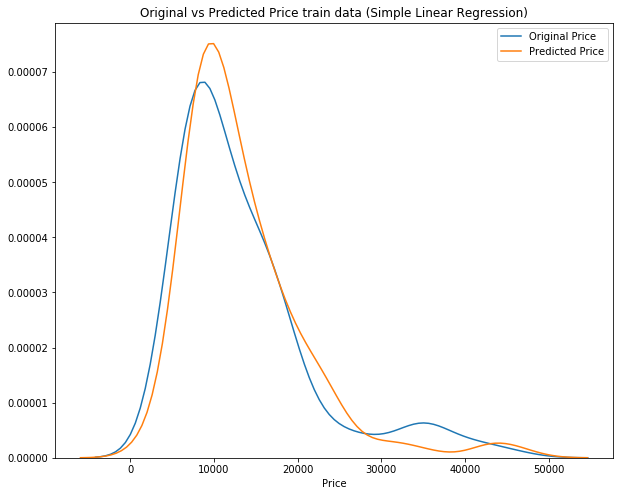

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(y_train_slr,hist=False,label="Original Price")
sns.distplot(yhat_train_slr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price train data (Simple Linear Regression)")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

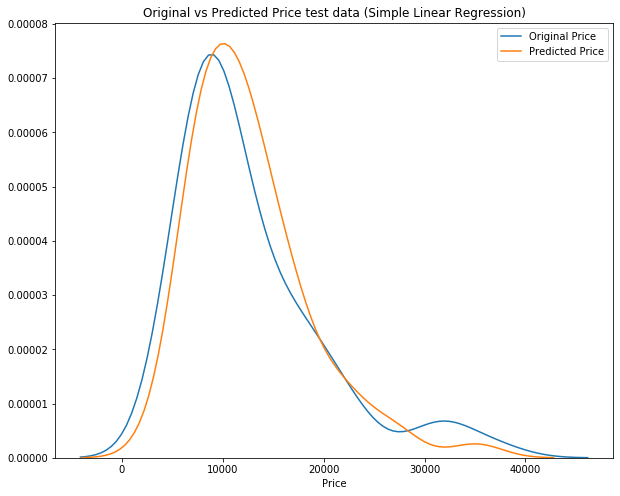

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(y_test_slr,hist=False,label="Original Price")
sns.distplot(yhat_test_slr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price test data (Simple Linear Regression)")
plt.xlabel("Price")

Simple linear regression model shows pretty good result

Cross Validation Score

In [13]:
cross_score_slr=cross_val_score(lm_slr,x_test_slr,y_test_slr)
cross_score_slr.mean()

0.326553561159035

Mean Squared Error

In [14]:
mean_error_slr=mean_squared_error(yhat_test_slr,y_test_slr)
mean_error_slr

15446938.691334337

R2 value

In [15]:
r2_slr=lm_slr.score(x_test_slr,y_test_slr)
r2_slr

0.6887892619732783

# Multiple Linear Regression 

<br>y = a0+a1x1+a2x2..........+anxn</br>
<br>y = dependent variable</br>
<br>x1,x2,...,xn = independent variable</br>
<br>a0 = intercept</br>
<br>a1,a2,...,an = cofficient</br>

In [16]:
from sklearn.feature_selection import RFE

In [17]:
lm_mlr=LinearRegression()

In [18]:
x_mlr=df.drop(df[['horsepower-binned','price']],axis=1)
y_mlr=df['price']

In [19]:
rfe=RFE(lm_mlr,5)
rfe=rfe.fit(x_mlr,y_mlr)
z=x_mlr.columns[rfe.support_]
z

Index(['width', 'engine-size', 'horsepower', 'city-L/100km',
       'highway-L/100km'],
      dtype='object')

In [20]:
x_train_mlr,x_test_mlr,y_train_mlr,y_test_mlr=train_test_split(x_mlr[z],y_mlr,test_size=0.3,random_state=0)

In [21]:
lm_mlr.fit(x_train_mlr,y_train_mlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
yhat_train_mlr=lm_mlr.predict(x_train_mlr)

In [23]:
yhat_test_mlr=lm_mlr.predict(x_test_mlr)

Text(0.5, 0, 'Price')

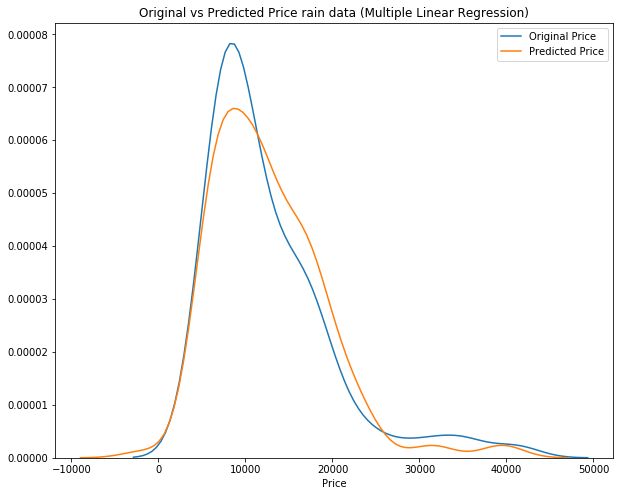

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(y_train_mlr,hist=False,label="Original Price")
sns.distplot(yhat_train_mlr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price rain data (Multiple Linear Regression)")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

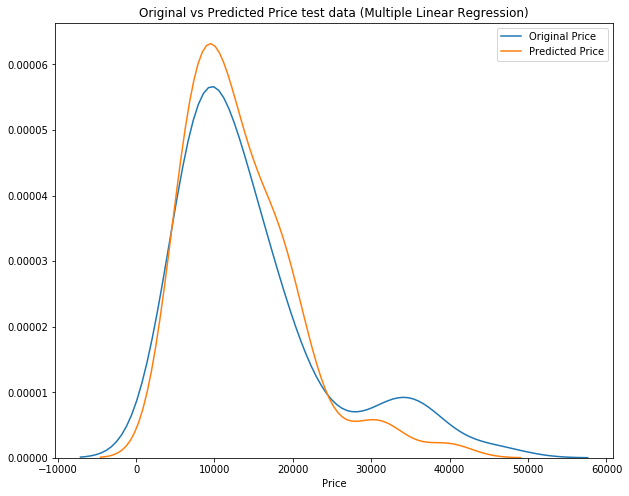

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(y_test_mlr,hist=False,label="Original Price")
sns.distplot(yhat_test_mlr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price test data (Multiple Linear Regression)")
plt.xlabel("Price")

Cross Validation Score

In [26]:
cross_val_mlr=cross_val_score(lm_mlr,x_test_mlr,y_test_mlr)
cross_val_mlr.mean()

0.8624831533654138

Mean Squared Error

In [27]:
mean_error_mlr=mean_squared_error(yhat_test_mlr,y_test_mlr)
mean_error_mlr

19637652.97310373

R2 Score

In [28]:
r2_mlr=lm_mlr.score(x_test_mlr,y_test_mlr)
r2_mlr

0.7708377040905359

# Polynomial Regression

In [29]:
#checking weather polynomial model can better fit the model 
x=df['highway-L/100km']
y=df['price']
f=np.polyfit(x,y,5)
p=np.poly1d(f)
p

poly1d([-2.02168213e+00,  1.02169330e+02, -2.01745849e+03,  1.96537082e+04,
       -9.15629134e+04,  1.67663084e+05])

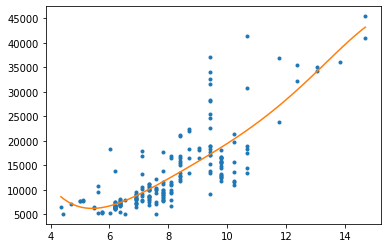

In [30]:
#taking 100 values between highway-L/100km minimum and maximum value
x_new=np.linspace(df['highway-L/100km'].min(),df['highway-L/100km'].max(),100)
#polynomial values of degree 5 of the new values
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
pr=PolynomialFeatures(degree=2)

In [33]:
z_pr=pr.fit_transform(x_mlr[z])

In [34]:
z_pr=pd.DataFrame(z_pr)

In [35]:
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(z_pr,df['price'],test_size=0.3,random_state=1)

In [36]:
lm_poly=LinearRegression()

In [37]:
lm_poly.fit(x_train_poly,y_train_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
yhat_train_poly=lm_poly.predict(x_train_poly)

In [39]:
yhat_test_poly=lm_poly.predict(x_test_poly)

Text(0.5, 0, 'Price')

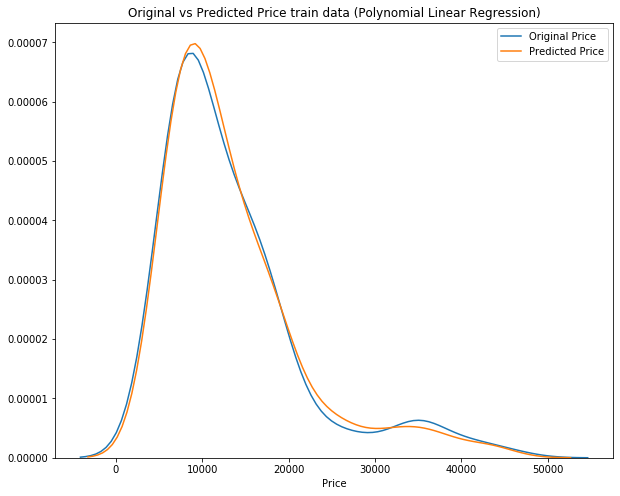

In [40]:
plt.figure(figsize=(10,8))
sns.distplot(y_train_poly,hist=False,label="Original Price")
sns.distplot(yhat_train_poly,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price train data (Polynomial Linear Regression)")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

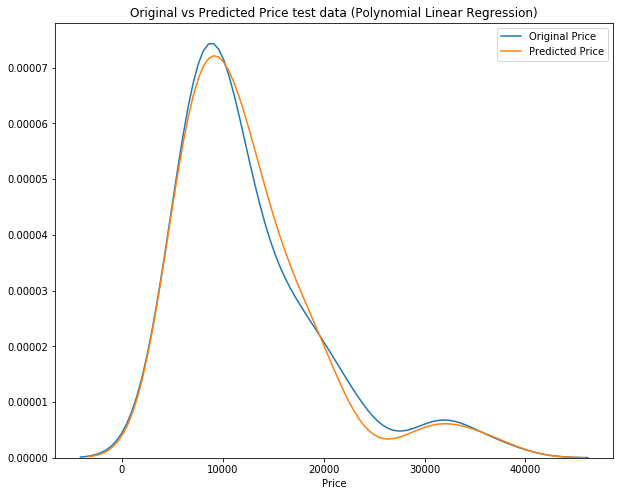

In [41]:
plt.figure(figsize=(10,8))
sns.distplot(y_test_poly,hist=False,label="Original Price")
sns.distplot(yhat_test_poly,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price test data (Polynomial Linear Regression)")
plt.xlabel("Price")

above distribution plot shows that polynomial model fits the data perfectly as compair to multiple or simple linear regression model

Cross Validation Score

In [42]:
cross_val_poly=cross_val_score(lm_poly,x_test_poly,y_test_poly)
cross_val_poly.mean()

-0.26277562009341654

Mean Squared Error

In [43]:
mean_error_poly=mean_squared_error(yhat_test_poly,y_test_poly)
mean_error_poly

5357185.720506018

R2 Value

In [44]:
r2_poly=lm_poly.score(x_test_poly,y_test_poly)
r2_poly

0.892068340844766

# Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [47]:
pipe=Pipeline(Input)

In [49]:
pipe.fit(x_mlr,y)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [51]:
ypipe=pipe.predict(x_mlr)
ypipe[:5]

array([12779.54798628, 12779.54798628, 20004.92282321,  9449.24807705,
       15154.14527412])

In [53]:
lm_mlr.fit(x_mlr,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lm_mlr.intercept_

-54869.25666329467

In [56]:
lm_mlr.score(x_mlr,df['price'])

0.8263414868694067

In [58]:
Yhat=lm_mlr.predict(x_mlr)

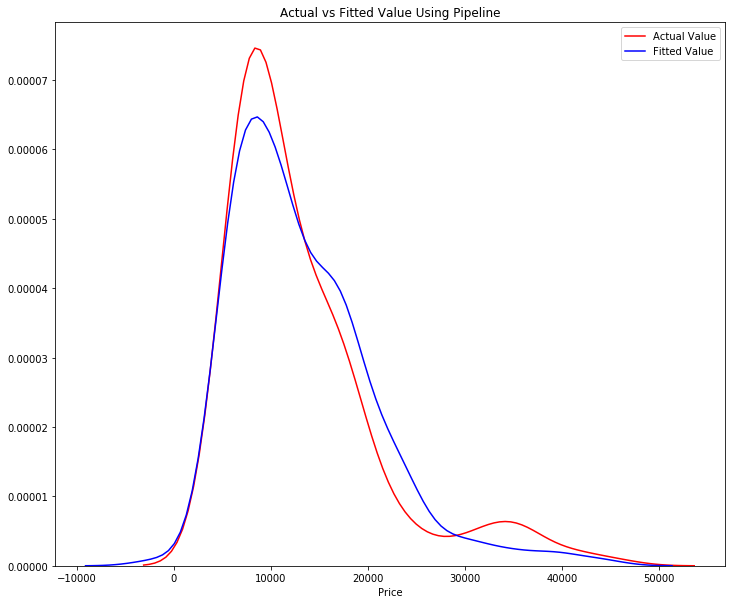

In [59]:
plt.figure(figsize=(12,10))
ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(Yhat,hist=False,color='b',label='Fitted Value',ax=ax1)
plt.title('Actual vs Fitted Value Using Pipeline')
plt.xlabel('Price')
plt.show('Properties')
plt.close()

We can conclude by looking the Mean Squared value and R2 value that polynomial regression fit more perfect for the given car data as compaired to simple or multiple linear regression